# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE

link = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz"

wine_data = pd.read_csv(link, sep="\t")
wine_data.sample(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
482,10.6,0.360,0.59,2.20,0.152,6.0,18.0,0.99860,3.04,1.05,9.4,5
843,7.1,0.685,0.35,2.00,0.088,9.0,92.0,0.99630,3.28,0.62,9.4,5
128,8.0,0.590,0.16,1.80,0.065,3.0,16.0,0.99620,3.42,0.92,10.5,7
727,6.4,0.570,0.02,1.80,0.067,4.0,11.0,0.99700,3.46,0.68,9.5,5
856,9.3,0.360,0.39,1.50,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,6
244,15.0,0.210,0.44,2.20,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
1437,6.8,0.915,0.29,4.80,0.070,15.0,39.0,0.99577,3.53,0.54,11.1,5
469,8.7,0.820,0.02,1.20,0.070,36.0,48.0,0.99520,3.20,0.58,9.8,5
1156,8.5,0.180,0.51,1.75,0.071,45.0,88.0,0.99524,3.33,0.76,11.8,7
279,8.9,0.400,0.32,5.60,0.087,10.0,47.0,0.99910,3.38,0.77,10.5,7


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [4]:
# YOUR CODE HERE

wine_data.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'target']

YOUR ANSWERS HERE

Fixed Acidity - Continuous variable that measures the acids that come from grapes and through yeast

Volatile Acidity - Continuous variable that measures the acids that are produiced during fermentation

Citric Acid - Continuous variable that is used to regulate acidity and the fermentation process

Residual Sugar - Continuous variable that measures the amount of sugar remaining after fermentation

Chlorides - Continuous variable that measures the salinity of the wine

Free Sulfur Dioxide - Continuous variable that measures the amount of unbounded sulfur dioxide available to prevent spoilage and oxidation

Total Sulfur Dioxide - Continuous variable that measures the total amount of bounded and unbounded sulfur dioxide in the wine

Density - Continuous variable that measures the compactness of the wine

pH - Continuous variable that measures concentration of hydrogen ions, representing the acidity or alkalinity of the wine

Sulphates - Continuous variable that measures the amount naturally occurring compouunds, both produced through feremenation and those added later, that maintain the wine's flavor and freshness

Alcohol - Continuous variable that measures the percentage of alcohol content in the wine,correlated with the amount of sugar developed in the grapes at harvest

Target - Ordinal variable that represents the sensory based quality score by taking the median score of at least 3 wine experts

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

--- Data Set Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


--- Descriptive Statistics ---
       fixed acidity  volatile acidity  citric acid  residual su

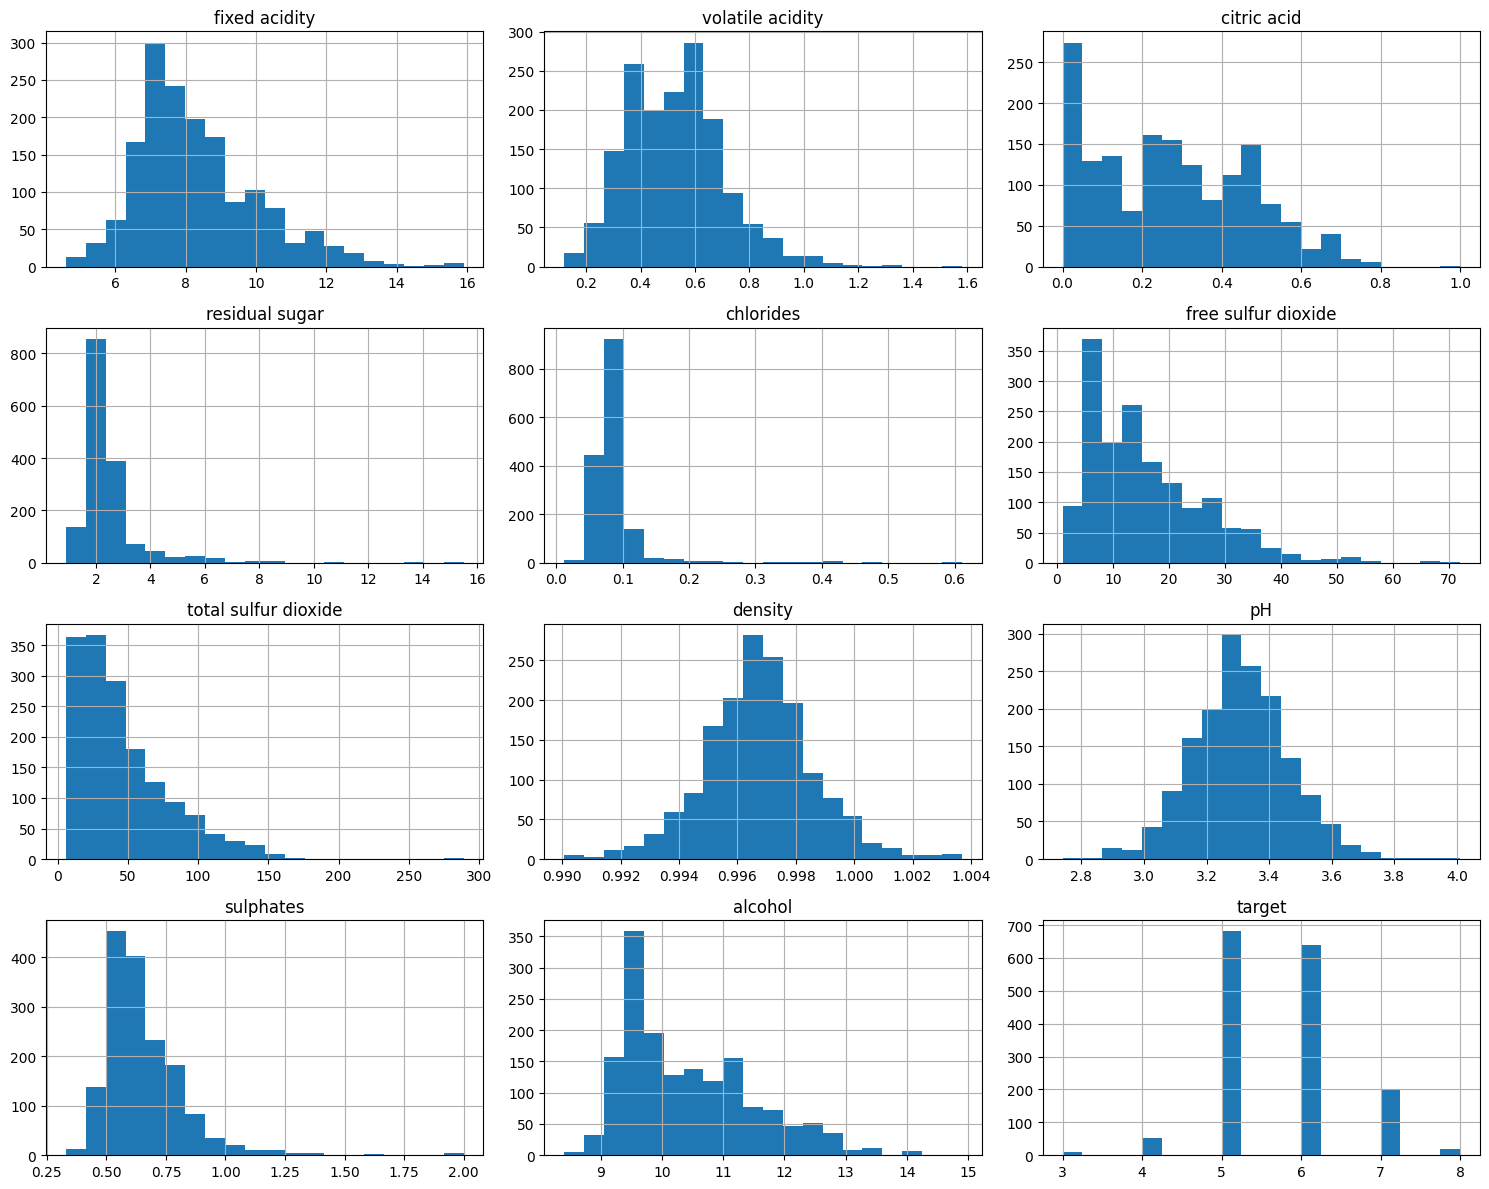

--- Box Plots for All Columns ---


--- Scatter Plots of Inputs vs. Target ---


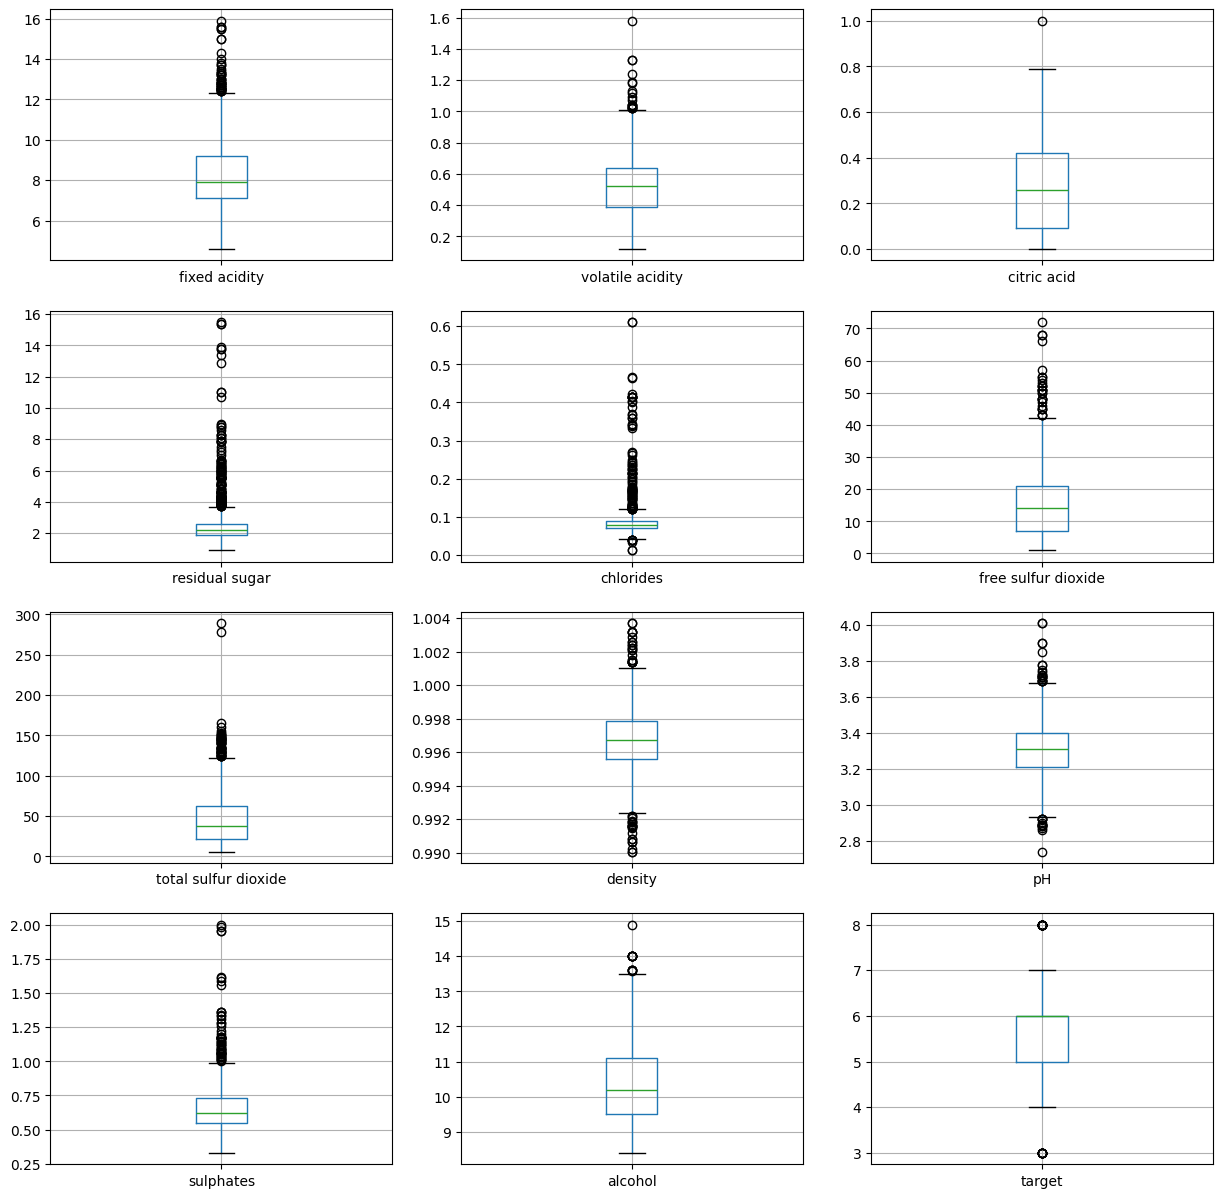

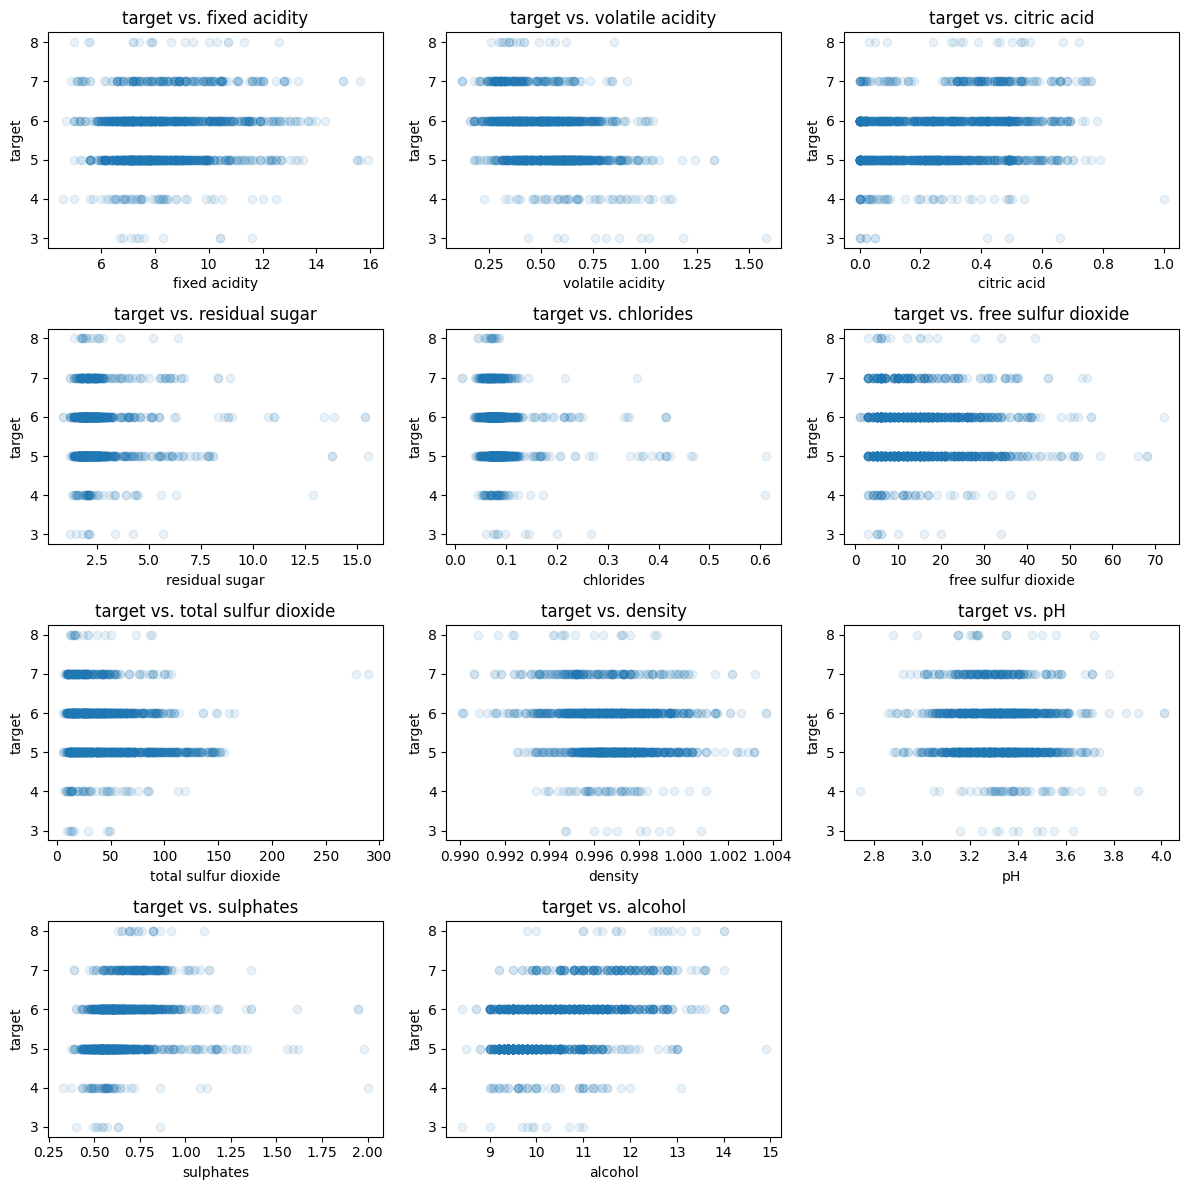

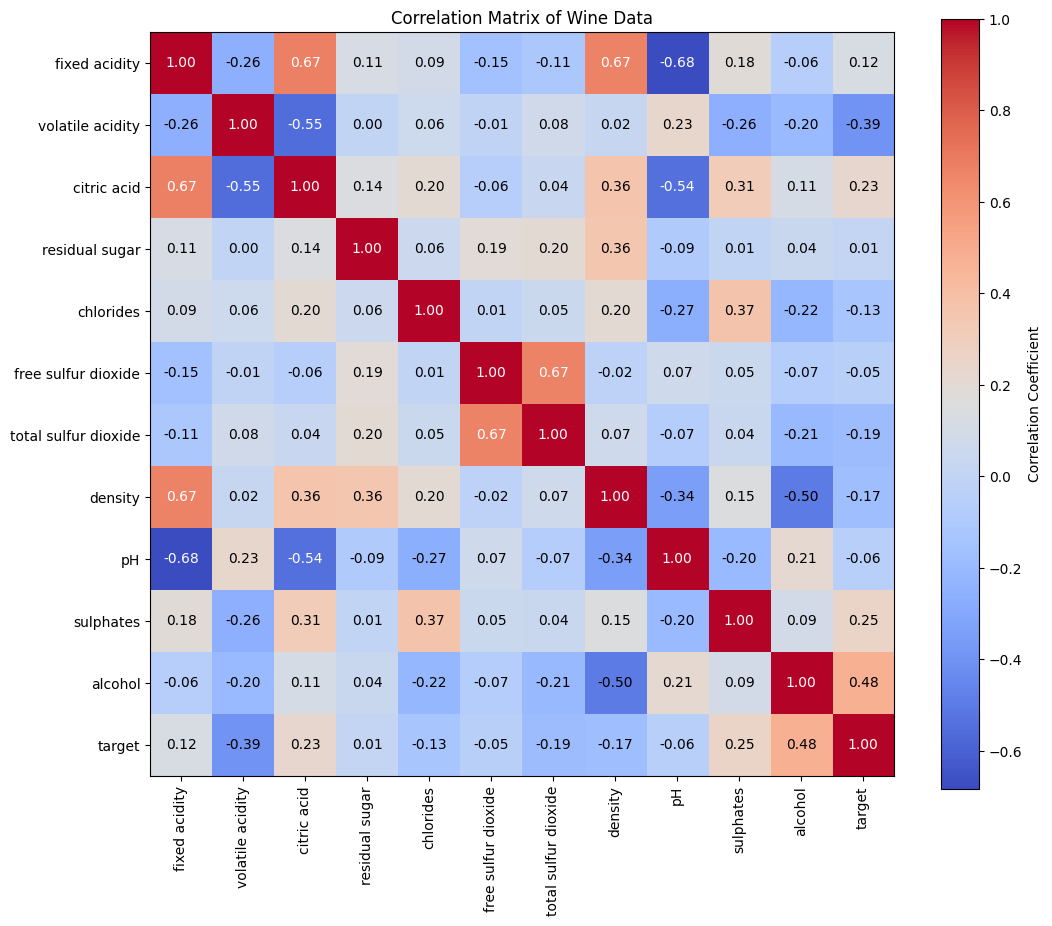

In [5]:
# YOUR CODE HERE

print("--- Data Set Information ---")
wine_data.info()
print("\n\n--- Descriptive Statistics ---")
print(wine_data.describe())

print("\n\n--- Histograms for All Columns ---")
wine_data.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()

print("--- Box Plots for All Columns ---")
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten() 

for i, col in enumerate(wine_data.columns):
    ax = axes[i]
    wine_data.boxplot(column=[col], ax=ax)


print("\n\n--- Scatter Plots of Inputs vs. Target ---")
input_columns = wine_data.columns.drop('target')
target_column = 'target'

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(input_columns):
    ax = axes[i]
    ax.scatter(wine_data[col], wine_data[target_column], alpha=0.1)
    ax.set_title(f'{target_column} vs. {col}')
    ax.set_xlabel(col)
    ax.set_ylabel(target_column)

for i in range(len(input_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show() 

corr_matrix = wine_data.corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix of Wine Data')
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="white" if abs(corr_matrix.iloc[i, j]) > 0.5 else "black")

plt.show()


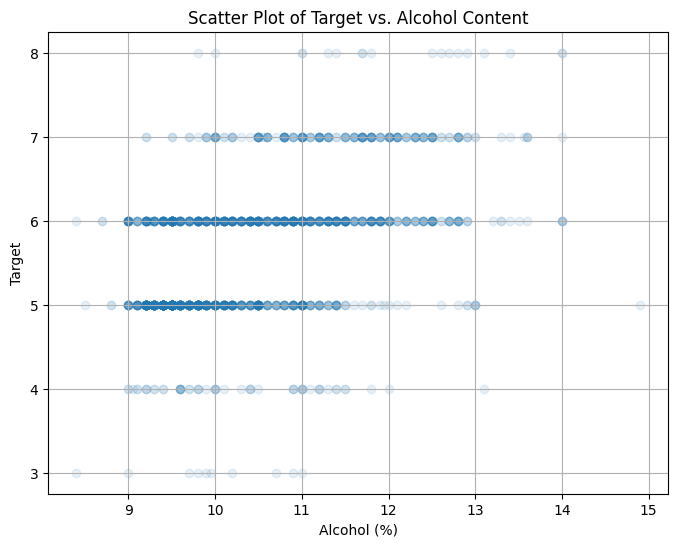

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(wine_data['alcohol'], wine_data['target'], alpha=0.1)
plt.title('Scatter Plot of Target vs. Alcohol Content')
plt.xlabel('Alcohol (%)')
plt.ylabel('Target')
plt.grid(True)
plt.show()

YOUR ANSWERS HERE

The Target vs. Alcohol Content scatter plot is interesting because it depicts a positive trend. The relationship is not perfectly linear, however per the heatmap this is the strongest positive correlation with the Target attribute.

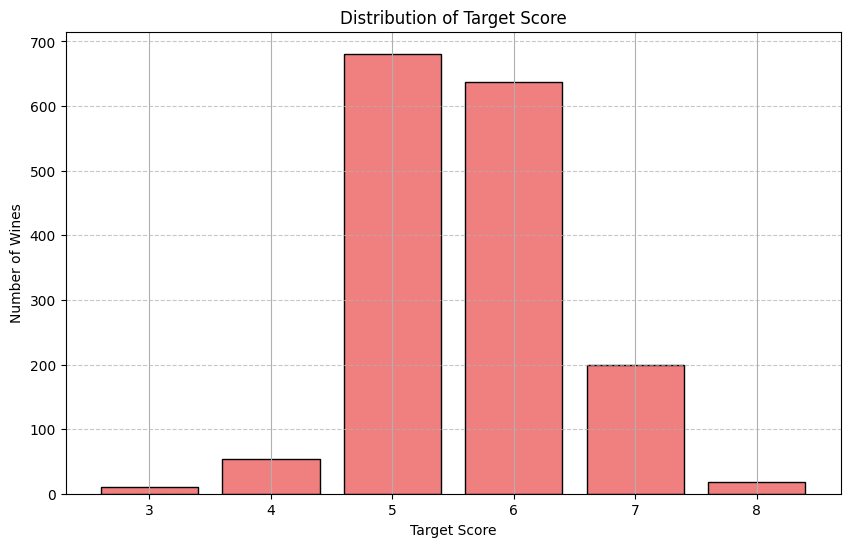

In [7]:
plt.figure(figsize=(10, 6))
wine_data['target'].hist(bins=np.arange(2.5, 9.5, 1), rwidth=0.8, color='lightcoral', edgecolor='black')
plt.title('Distribution of Target Score')
plt.xlabel('Target Score')
plt.ylabel('Number of Wines')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

YOUR ANSWERS HERE 

The histogram of the Target attribute is interesting because it shows that there are much fewer samples of low-quality and high-quality wines than there are of average-scored wines. This means that a predictive model will be biased toward predicting average scores and will have difficulty identifing the attributes of low-quality or high-quality wines. 

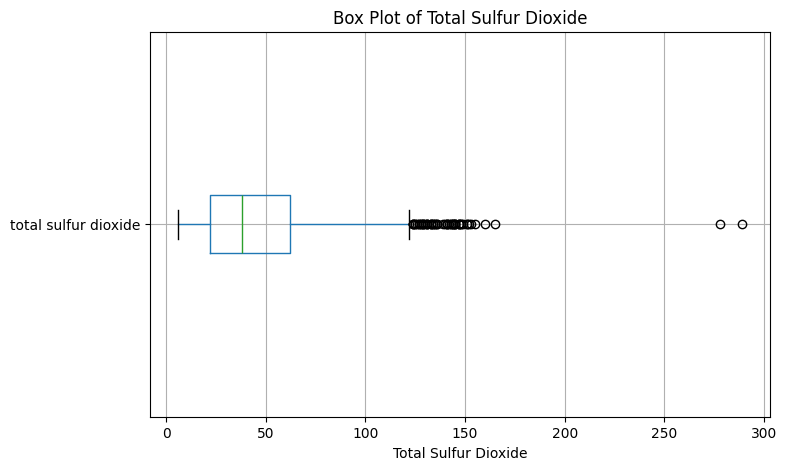

In [8]:
plt.figure(figsize=(8, 5))
wine_data.boxplot(column=['total sulfur dioxide'], vert=False)
plt.title('Box Plot of Total Sulfur Dioxide')
plt.xlabel('Total Sulfur Dioxide')
plt.show()

YOUR ANSWEERS HERE

The Box Plot of Total Sulfur Dioxide is interesting because its positively skewed distribution. 50% of the data lies within a small range while the rest extend far to the right, which can disproportionately impact mmodel trainin. 

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

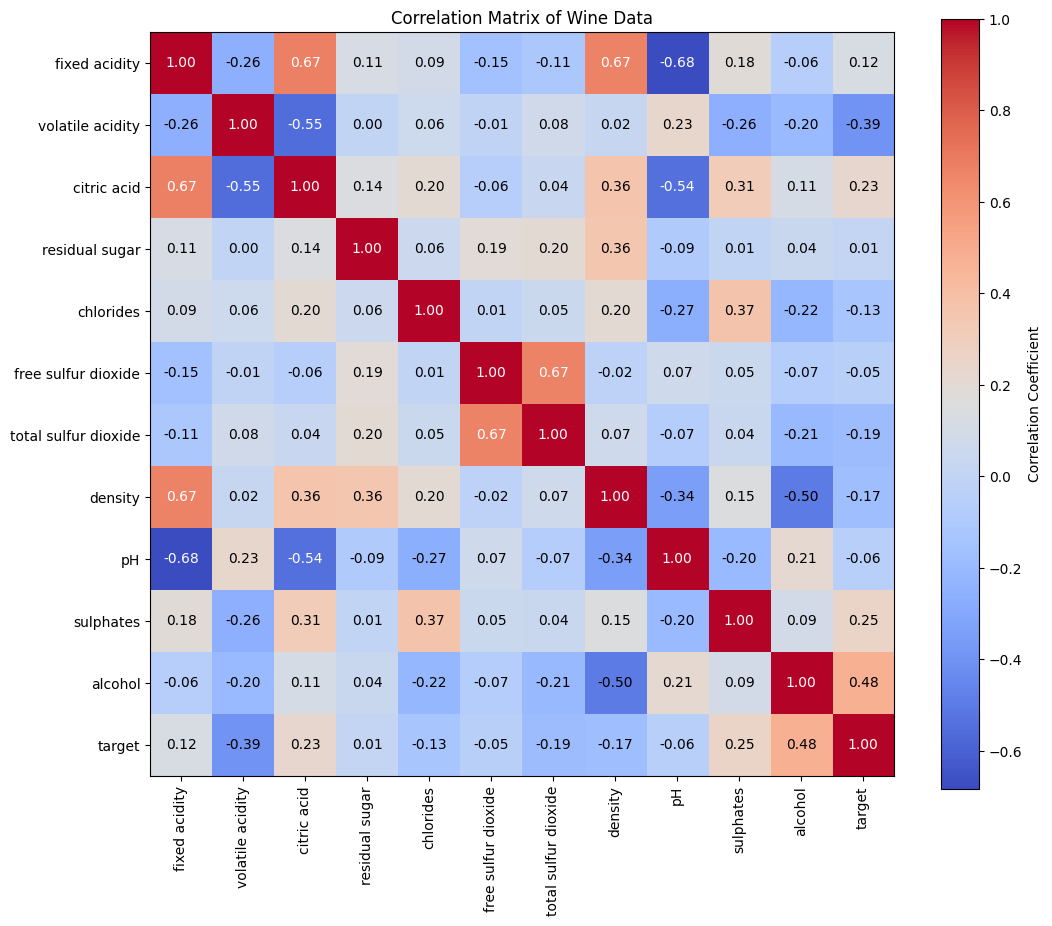

In [9]:
# YOUR CODE HERE

corr_matrix = wine_data.corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix of Wine Data')
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="white" if abs(corr_matrix.iloc[i, j]) > 0.5 else "black")

plt.show()

YOUR ANSWERS HERE

One of the strongest positive correlations is between Free Sulfur Dioxie and Total Sulfur Dioxide at 0.67. The correlations between Fixed Acidity and Density and betweem Fixed Acidity and Citric Acid are also at 0.67; which can indicate that there's a multicolinearity between them.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

Lasso Regression Model

Scikit Learn Documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

Other Page (https://www.geeksforgeeks.org/machine-learning/what-is-lasso-regression/)

KNeighbors Regressor

Scikit Learn Documetation (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)

Other Page (https://en.wikipedia.org/wiki/K-nearest_neighbors_algorith) 

Gaussian Process Regressor

Scikit Learn Documentation (https://scikit-learn.org/stable/modules/generated/sklearn.
gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor)

Other Page (https://www.geeksforgeeks.org/machine-learning/gaussian-process-regression-gpr/)


YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

--- Lasso Regression Model Results ---
L2 Loss (Mean Squared Error): 0.4308
L1 Loss (Mean Absolute Error): 0.5100


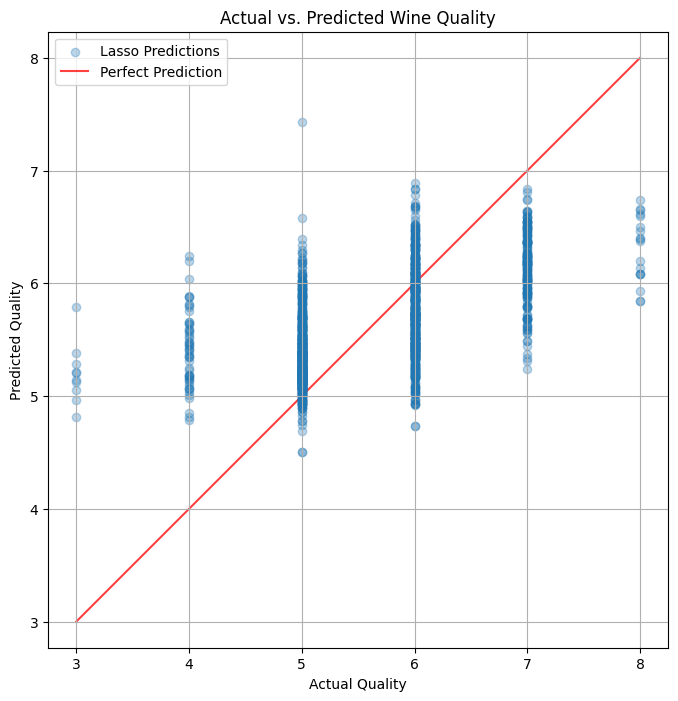

In [10]:
# YOUR CODE HERE
X = wine_data.drop('target', axis=1)
y = wine_data['target']

lasso_model = sklearn.linear_model.Lasso(alpha=0.01)
lasso_model.fit(X, y)

lasso_predictions = lasso_model.predict(X)

l2_loss_lasso = np.mean((y - lasso_predictions)**2)
l1_loss_lasso = np.mean(np.abs(y - lasso_predictions))

print("--- Lasso Regression Model Results ---")
print(f"L2 Loss (Mean Squared Error): {l2_loss_lasso:.4f}")
print(f"L1 Loss (Mean Absolute Error): {l1_loss_lasso:.4f}")

plt.figure(figsize=(8, 8))
plt.scatter(y, lasso_predictions, alpha=0.3, label='Lasso Predictions')

lims = [min(y.min(), lasso_predictions.min()), max(y.max(), lasso_predictions.max())]
plt.plot(lims, lims, 'r-', alpha=0.75, zorder=0, label='Perfect Prediction')

plt.title('Actual vs. Predicted Wine Quality')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


--- K-Neighbors Regression Model Results ---
L2 Loss (Mean Squared Error): 0.3549
L1 Loss (Mean Absolute Error): 0.4408


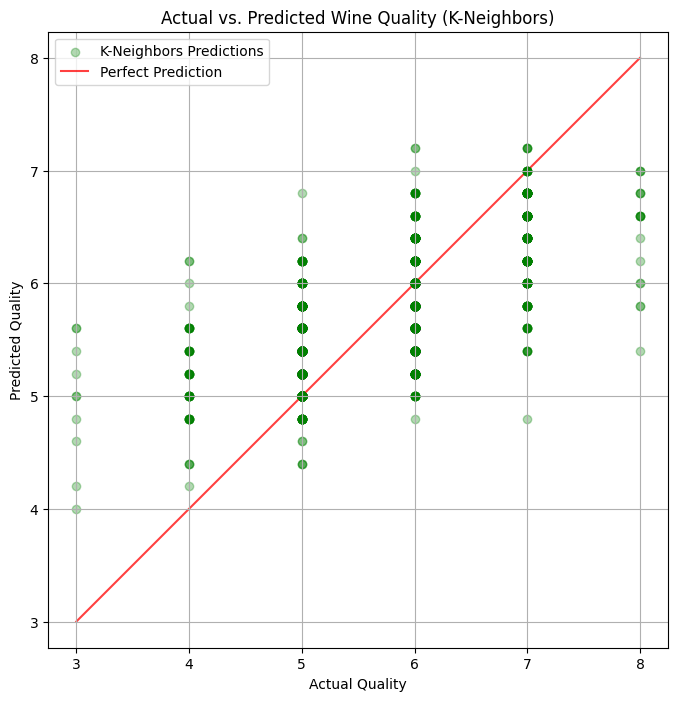

In [11]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)
knn_predictions = knn_model.predict(X)

l2_loss_knn = np.mean((y - knn_predictions)**2)
l1_loss_knn = np.mean(np.abs(y - knn_predictions))

print("--- K-Neighbors Regression Model Results ---")
print(f"L2 Loss (Mean Squared Error): {l2_loss_knn:.4f}")
print(f"L1 Loss (Mean Absolute Error): {l1_loss_knn:.4f}")

plt.figure(figsize=(8, 8))
plt.scatter(y, knn_predictions, alpha=0.3, label='K-Neighbors Predictions', color='green')

lims = [min(y.min(), knn_predictions.min()), max(y.max(), knn_predictions.max())]
plt.plot(lims, lims, 'r-', alpha=0.75, zorder=0, label='Perfect Prediction')

plt.title('Actual vs. Predicted Wine Quality (K-Neighbors)')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

--- Gaussian Process Regression Model Results ---
L2 Loss (Mean Squared Error): 0.0000
L1 Loss (Mean Absolute Error): 0.0000


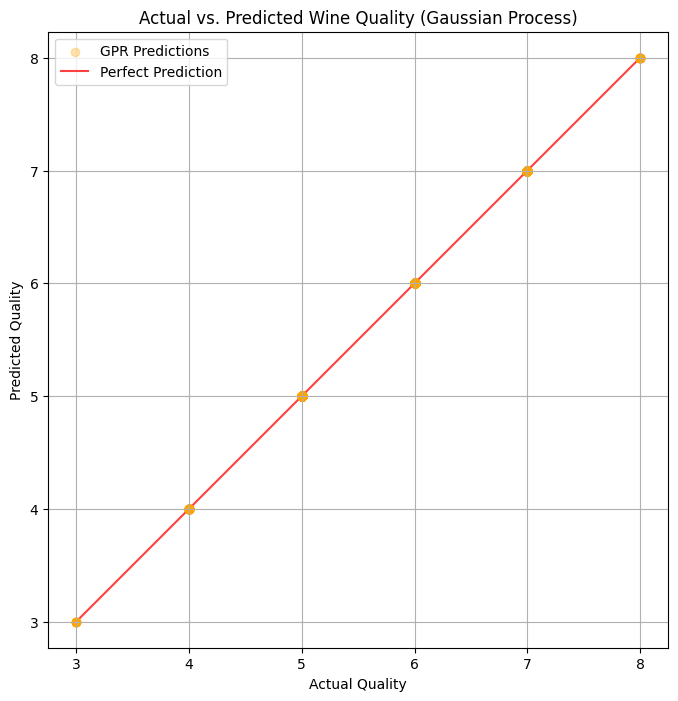

In [12]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kernel = RBF()
gpr_model = GaussianProcessRegressor(kernel=kernel, random_state=42)

gpr_model.fit(X_scaled, y)

gpr_predictions = gpr_model.predict(X_scaled)

l2_loss_gpr = np.mean((y - gpr_predictions)**2)
l1_loss_gpr = np.mean(np.abs(y - gpr_predictions))

print("--- Gaussian Process Regression Model Results ---")
print(f"L2 Loss (Mean Squared Error): {l2_loss_gpr:.4f}")
print(f"L1 Loss (Mean Absolute Error): {l1_loss_gpr:.4f}")

plt.figure(figsize=(8, 8))
plt.scatter(y, gpr_predictions, alpha=0.3, label='GPR Predictions', color='orange')

lims = [min(y.min(), gpr_predictions.min()), max(y.max(), gpr_predictions.max())]
plt.plot(lims, lims, 'r-', alpha=0.75, zorder=0, label='Perfect Prediction')

plt.title('Actual vs. Predicted Wine Quality (Gaussian Process)')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [22]:
# YOUR CODE HERE

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

l2_loss_lasso_full = 0.5654
l2_loss_knn_full = 0.4011
l2_loss_gpr_full = 0.0000 

lasso_model = sklearn.linear_model.Lasso(alpha=0.01)
lasso_cv_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
l2_loss_lasso_cv = -np.mean(lasso_cv_scores)

print("--- Lasso Regression ---")
print(f"L2 Loss (Full Dataset): {l2_loss_lasso_full:.4f}")
print(f"L2 Loss (5-fold CV): {l2_loss_lasso_cv:.4f}\n")

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='neg_mean_squared_error')
l2_loss_knn_cv = -np.mean(knn_cv_scores)

print("--- K-Neighbors Regression ---")
print(f"L2 Loss (Full Dataset): {l2_loss_knn_full:.4f}")
print(f"L2 Loss (5-fold CV): {l2_loss_knn_cv:.4f}\n")

gpr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gpr', GaussianProcessRegressor(kernel=RBF(), n_restarts_optimizer=12, random_state=42))
])
gpr_cv_scores = cross_val_score(gpr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
l2_loss_gpr_cv = -np.mean(gpr_cv_scores)

print("--- Gaussian Process Regression ---")
print(f"L2 Loss (Full Dataset): {l2_loss_gpr_full:.4f}")
print(f"L2 Loss (5-fold CV): {l2_loss_gpr_cv:.4f}\n")


--- Lasso Regression ---
L2 Loss (Full Dataset): 0.5654
L2 Loss (5-fold CV): 0.4439

--- K-Neighbors Regression ---
L2 Loss (Full Dataset): 0.4011
L2 Loss (5-fold CV): 0.6514



c:\Users\santo\OneDrive\Documents\GitHub\Learning\.venv\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 6 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\santo\OneDrive\Documents\GitHub\Learning\.venv\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 6 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


--- Gaussian Process Regression ---
L2 Loss (Full Dataset): 0.0000
L2 Loss (5-fold CV): 3.9200



YOUR ANSWERS HERE

The L2 losses for the Lasso regression are slightly higher when testing on the full dataset, indicating a small amount of overfitting. The L2 losses for the K-Neighbors are slightly lower when testing on the full dataset, also suggesting minimal overfitting. The L2 losses for the Gaussian Regression however differed. The L2 loss of the full dataset was zero and the cross-validated L2 loss is over three, indicating severe overfitting. 

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [23]:
# YOUR CODE HERE

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error 

l2_loss_lasso_orig = 0.5654
l2_loss_knn_orig = 0.4011
l2_loss_gpr_orig = 0.0000

lasso_pipeline = Pipeline([
('scaler', StandardScaler()),
('lasso', Lasso(alpha=0.01))
])
lasso_pipeline.fit(X, y)
lasso_pipe_predictions = lasso_pipeline.predict(X)
l2_loss_lasso_pipe = mean_squared_error(y, lasso_pipe_predictions)

print("--- Lasso Regression with Scaling ---")
print(f"Original L2 Loss: {l2_loss_lasso_orig:.4f}")
print(f"Pipeline L2 Loss: {l2_loss_lasso_pipe:.4f}\n")

knn_pipeline = Pipeline([
('scaler', StandardScaler()),
('knn', KNeighborsRegressor(n_neighbors=5))
])
knn_pipeline.fit(X, y)
knn_pipe_predictions = knn_pipeline.predict(X)
l2_loss_knn_pipe = mean_squared_error(y, knn_pipe_predictions)

print("--- K-Neighbors Regression with Scaling ---")
print(f"Original L2 Loss: {l2_loss_knn_orig:.4f}")
print(f"Pipeline L2 Loss: {l2_loss_knn_pipe:.4f}\n")

gpr_pipeline_scaled = Pipeline([
('scaler', StandardScaler()),
('gpr', GaussianProcessRegressor(kernel=RBF(), random_state=42))
])
gpr_pipeline_scaled.fit(X, y)
gpr_pipe_predictions = gpr_pipeline_scaled.predict(X)
l2_loss_gpr_pipe = mean_squared_error(y, gpr_pipe_predictions)

print("--- Gaussian Process Regression with Scaling ---")
print(f"Original L2 Loss: {l2_loss_gpr_orig:.4f}")
print(f"Pipeline L2 Loss: {l2_loss_gpr_pipe:.4f}\n")

--- Lasso Regression with Scaling ---
Original L2 Loss: 0.5654
Pipeline L2 Loss: 0.4186

--- K-Neighbors Regression with Scaling ---
Original L2 Loss: 0.4011
Pipeline L2 Loss: 0.2907

--- Gaussian Process Regression with Scaling ---
Original L2 Loss: 0.0000
Pipeline L2 Loss: 0.0000



YOUR ANSWERS HERE

For the Lasso regression the L2 loss decreased significantly, meaning that scaling the data had a positive impact on the model's performance. The K-Neighbors regression's L2 loss also decreased, indicating that it improved the model. For the Gaussian regression the L2 loss remained the same, since Problem 6's model was already scaled. 

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [26]:
# YOUR CODE HERE

# The repeated decision trees could possibly lead to a better model, but using a more automated, systemic method is much more efficient for finding the best parameters and model. 

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [16]:
# YOUR CODE HERE

YOUR ANSWERS HERE